# 15_2.Chi-square test(동질성)(연습문제)
- https://www.statsmodels.org/devel/contingency_tables.html

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
prech_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/15_2.bandage.csv', encoding="cp949")
prech_df.head()

,bandage,healed,count
0,1,1,35
1,1,2,30
2,2,1,19
3,2,2,48


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [4]:
prech_df['bandage'].replace({1:'elastic', 2:'inelastic'}, inplace=True)
prech_df['healed'].replace({1:'Yes', 2:'No'}, inplace=True)
prech_df['bandage'] = prech_df['bandage'].astype('category')
prech_df['healed'] = prech_df['healed'].astype('category')
prech_df

,bandage,healed,count
0,elastic,Yes,35
1,elastic,No,30
2,inelastic,Yes,19
3,inelastic,No,48


### 2.3 자료구조 살펴보기

In [5]:
prech_df.shape

(4, 3)

In [6]:
prech_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   bandage  4 non-null      category
 1   healed   4 non-null      category
 2   count    4 non-null      int64   
dtypes: category(2), int64(1)
memory usage: 416.0 bytes


In [7]:
prech_df.columns

Index(['bandage', 'healed', 'count'], dtype='object')

## 3.Chi-square test(동질성)

### 3.1 분할표(contingency table)

In [9]:
tab = pd.crosstab(prech_df['bandage'],
                  prech_df['healed'],
                  values = prech_df['count'],
                  aggfunc = 'sum')
tab

healed,No,Yes
bandage,,
elastic,30,35
inelastic,48,19


In [10]:
# 위치 조정
tab = tab.loc[["elastic", "inelastic"], :]
tab = tab.loc[:, ["Yes", "No"]]

In [11]:
tab

healed,Yes,No
bandage,,
elastic,35,30
inelastic,19,48


### 3.2 교차분석

In [12]:
# ch분석
result = sm.stats.Table(tab)

In [13]:
# observed
print(result.table_orig)

healed     Yes  No
bandage           
elastic     35  30
inelastic   19  48


In [14]:
# expected
print(result.fittedvalues)

healed           Yes         No
bandage                        
elastic    26.590909  38.409091
inelastic  27.409091  39.590909


In [15]:
# Pearson
rslt = result.test_nominal_association()
print(rslt.pvalue)

0.002904802391656358


### 3.3 표준화잔차

In [16]:
# 표준화 잔차
result.standardized_resids

healed,Yes,No
bandage,,
elastic,2.977637,-2.977637
inelastic,-2.977637,2.977637


### 3.4 상대적 위험률

In [17]:
table = np.asarray(tab)
table

array([[35, 30],
       [19, 48]])

In [18]:
table

array([[35, 30],
       [19, 48]])

In [19]:
t22 = sm.stats.Table2x2(table)

In [20]:
print(t22.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        2.947       1.433 6.062   0.003
Log odds ratio    1.081 0.368 0.360 1.802   0.003
Risk ratio        1.899       1.220 2.955   0.004
Log risk ratio    0.641 0.226 0.199 1.083   0.004
-------------------------------------------------


## 4.그래프

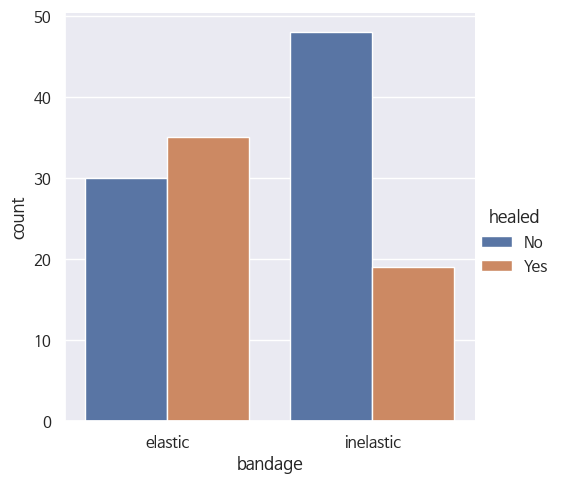

In [23]:
# 누적 막대그래프(count)
sns.catplot(x = "bandage",
            y = "count",
            hue = "healed",
            kind = "bar",
            data = prech_df)
plt.show()